In [462]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np

In [ ]:
df = pd.read_csv("LL-Output-Mon-27-Oct-2025-at-11-07-32AM.txt", header=None, names= ["MC step","Ratio","Energy","Order"],skiprows=9, delimiter=r"\s+")
plt.plot(df['MC step'], df['Order'])
plt.xlabel("MCS")
plt.ylabel(r"Reduced Energy, U/$\epsilon$")
plt.show()

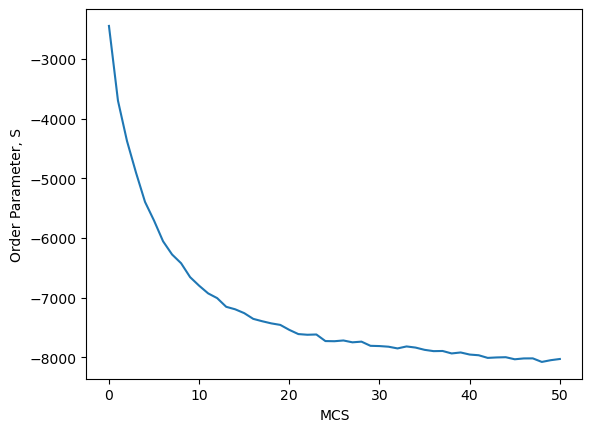

In [6]:
plt.plot(df['MC step'], df['Energy'])
plt.xlabel("MCS")
plt.ylabel("Order Parameter, S")
plt.show()

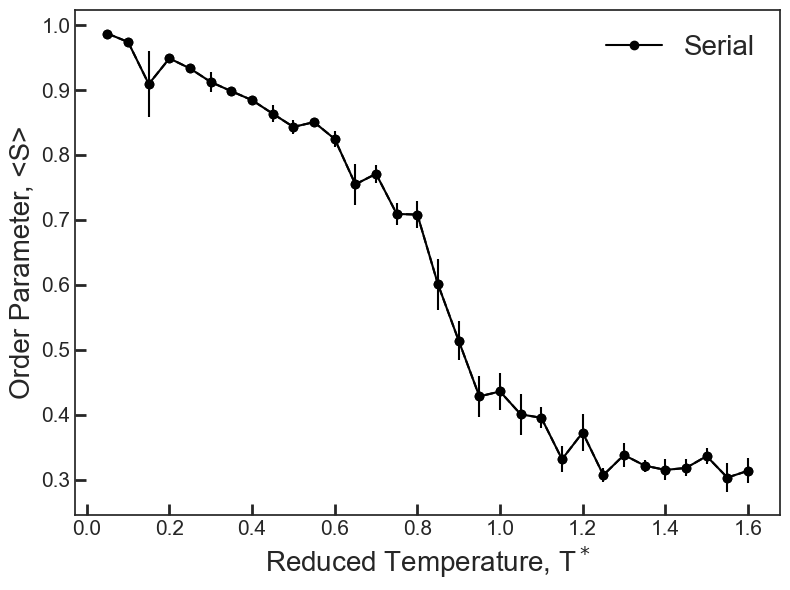

In [492]:
order_df = pd.read_csv("order.csv", header=0, delimiter=",")
numba = pd.read_csv("order-numba.csv", header=0, delimiter=",")
cython = pd.read_csv("order-cython.csv", header=0, delimiter=",")
cython_mpi = pd.read_csv("order-cython-mpi.csv", header=0, delimiter=",")
cython_omp = pd.read_csv("order-cython-omp.csv", header=0, delimiter=",")
mpi = pd.read_csv("order-mpi.csv", header=0, delimiter=",")
numba_vec = pd.read_csv("order-numba-vec.csv", header=0, delimiter=",")
numba_para = pd.read_csv("order-numba-para.csv", header=0, delimiter=",")
numpy = pd.read_csv("order-numpy.csv", header=0, delimiter=",")
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(8, 6))
order  = order_df.groupby(['Temp'])['Order']
mean_order =   order.mean()
error = order.std()
ax.errorbar(x=mean_order.index,      # X values (the Temperature)
    y=mean_order.values,     # Y values (the mean <S>)
    yerr=error.values/np.sqrt(5),
    marker="o",
    color='black',
    label='Serial',
    linestyle='--')
order_df.groupby(['Temp']).mean().plot(marker="o", ax=ax,color='black')
#numpy.groupby(['Temp']).mean().plot(marker="o", ax=ax)
#cython.groupby(['Temp']).mean().plot(marker="o", ax=ax)
#cython_mpi.groupby(['Temp']).mean().plot(marker="o", ax=ax)
#cython_omp.groupby(['Temp']).mean().plot(marker="o", ax=ax)
#numba_vec.groupby(['Temp']).mean().plot(marker="o", ax=ax)
#numba_para.groupby(['Temp']).mean().plot(marker="o", ax=ax)
#numpy.groupby(['Temp']).mean().plot(marker="o", ax=ax)
#mpi.groupby(['Temp']).mean().plot(marker="o", ax=ax)
plt.legend(['Serial'],fontsize=20)
plt.xlabel(r"Reduced Temperature, T$^*$",fontsize=20)
plt.ylabel("Order Parameter, <S>",fontsize=20)
plt.tick_params(direction="in",labelsize=15,axis='both',length=8,width=2)
plt.tight_layout()
plt.savefig('Order.png')
plt.show()

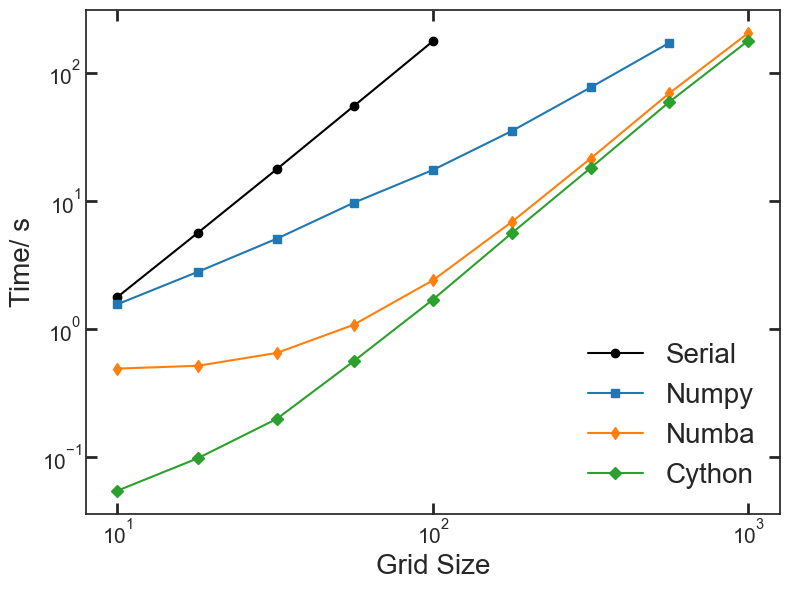

In [381]:
serial = pd.read_csv("timings-serial.csv", header=0, delimiter=",")
numpy = pd.read_csv("timings-numpy.csv",header=0,delimiter=',')
numba = pd.read_csv("timings-numba.csv", header=0, delimiter=",")
cython = pd.read_csv("timings-cython.csv", header=0, delimiter=",")
plt.style.use('seaborn-v0_8-white')
plt.rcParams["font.family"] = "sans-serif"
fig, ax = plt.subplots(figsize=(8, 6))
serial.groupby(['Size']).mean().plot(marker="o", ax=ax,color='black')
numpy.groupby(['Size']).mean().plot(marker="s", ax=ax)
numba.groupby(['Size']).mean().plot(marker="d", ax=ax)
cython.groupby(['Size']).mean().plot(marker="D", ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Serial','Numpy','Numba','Cython'],loc='lower right',fontsize=20)
plt.xlabel("Grid Size",fontsize=20)
plt.ylabel("Time/ s",fontsize=20)
plt.tick_params(direction="in",labelsize=15,axis='both',length=8,width=2)
plt.tight_layout()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.savefig('Serial-Speedup.png')
plt.show()

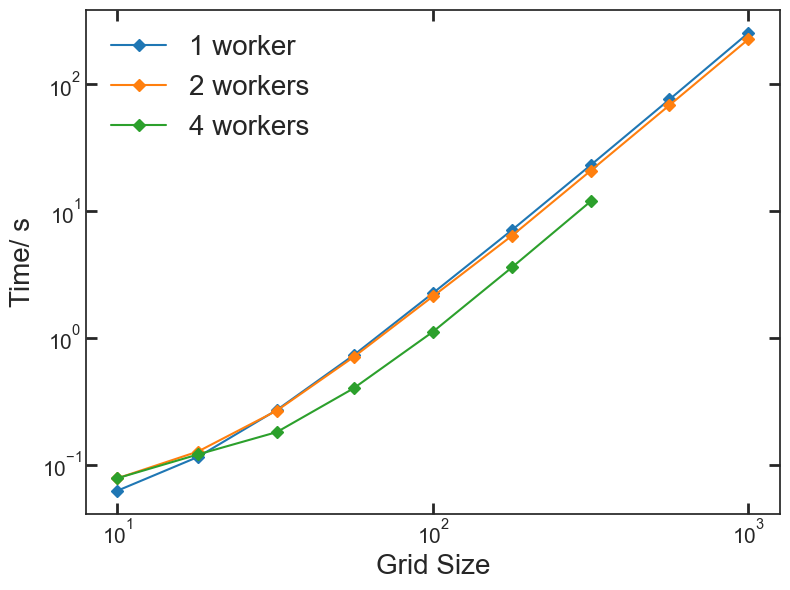

In [326]:
cython = pd.read_csv("timings-cython-mpi1.csv", header=0, delimiter=",")
cython_mpi2 = pd.read_csv("timings-cython-mpi2.csv", header=0, delimiter=",")
cython_mpi4 = pd.read_csv("timings-cython-mpi4.csv", header=0, delimiter=",")
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(8, 6))
cython.groupby(['Size']).mean().plot(marker="D", ax=ax)
cython_mpi2.groupby(['Size']).mean().plot(marker="D", ax=ax)
cython_mpi4.groupby(['Size']).mean().plot(marker="D", ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['1 worker','2 workers','4 workers'],fontsize=20)
plt.xlabel("Grid Size",fontsize=20)
plt.ylabel("Time/ s",fontsize=20)
plt.tick_params(direction="in",labelsize=15,axis='both',length=8,width=2)
plt.tight_layout()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.savefig('Cython-MPI-Speedup.png')
plt.show()

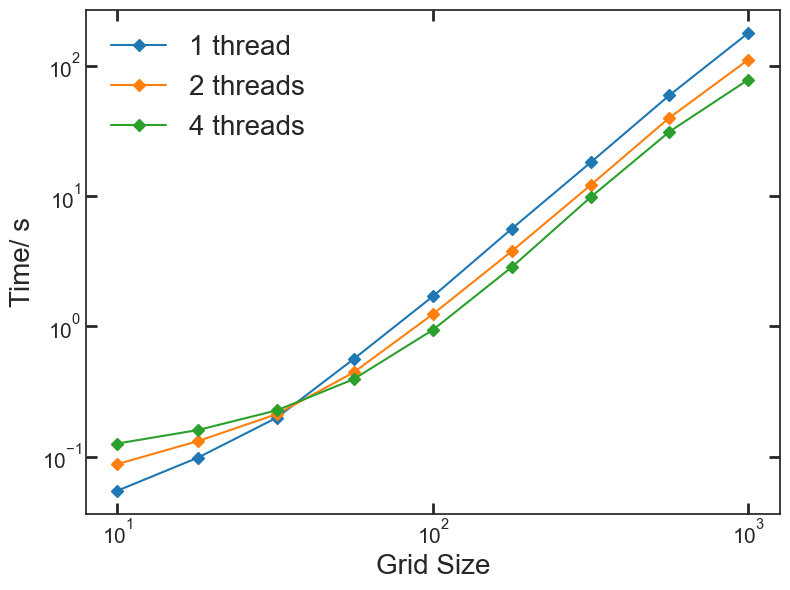

In [384]:
cython = pd.read_csv("timings-cython.csv", header=0, delimiter=",")
cython_omp2 = pd.read_csv("timings-cython-omp2.csv", header=0, delimiter=",")
cython_omp4 = pd.read_csv("timings-cython-omp4.csv", header=0, delimiter=",")
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(8, 6))
cython.groupby(['Size']).mean().plot(marker="D", ax=ax)
cython_omp2.groupby(['Size']).mean().plot(marker="D", ax=ax)
cython_omp4.groupby(['Size']).mean().plot(marker="D", ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['1 thread','2 threads','4 threads'],fontsize=20)
plt.xlabel("Grid Size",fontsize=20)
plt.ylabel("Time/ s",fontsize=20)
plt.tick_params(direction="in",labelsize=15,axis='both',length=8,width=2)
plt.tight_layout()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.savefig('Cython-OMP-Speedup.png')
plt.show()

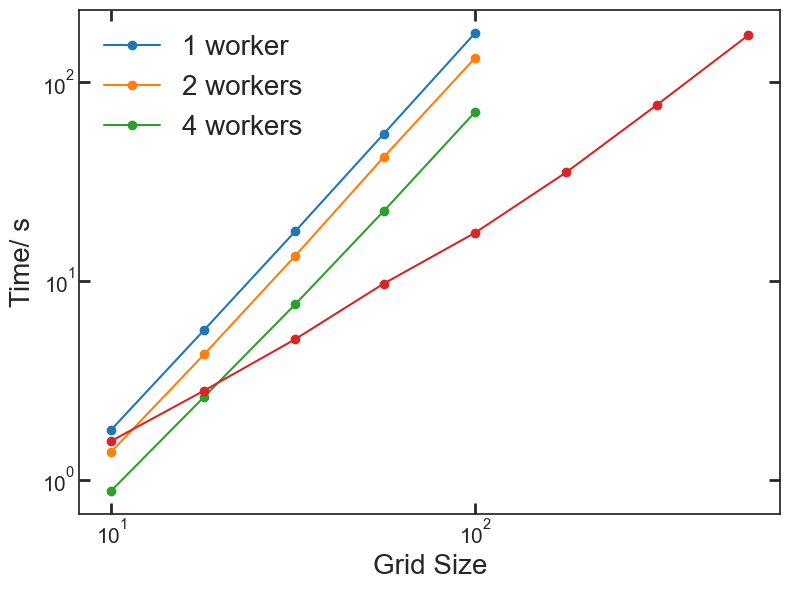

In [382]:
serial = pd.read_csv("timings-serial.csv", header=0, delimiter=",")
mpi2 = pd.read_csv("timings-mpi2.csv", header=0, delimiter=",")
mpi4 = pd.read_csv("timings-mpi4.csv", header=0, delimiter=",")
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(8, 6))
serial.groupby(['Size']).mean().plot(marker="o", ax=ax)
mpi2.groupby(['Size']).mean().plot(marker="o", ax=ax)
mpi4.groupby(['Size']).mean().plot(marker="o", ax=ax)
numpy.groupby(['Size']).mean().plot(marker="o", ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['1 worker','2 workers','4 workers'],fontsize=20)
plt.xlabel("Grid Size",fontsize=20)
plt.ylabel("Time/ s",fontsize=20)
plt.tick_params(direction="in",labelsize=15,axis='both',length=8,width=2)
plt.tight_layout()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.savefig('MPI-Speedup.png')
plt.show()

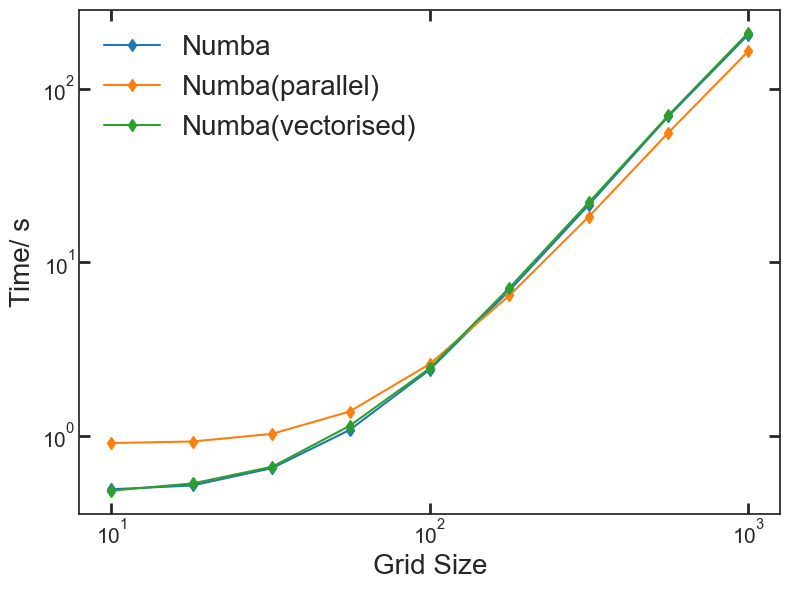

In [ ]:
numba = pd.read_csv("timings-numba.csv", header=0, delimiter=",")
numba_para = pd.read_csv("timings-numba-para.csv", header=0, delimiter=",")
numba_vec = pd.read_csv("timings-numba-vec.csv", header=0, delimiter=",")
plt.style.use('seaborn-v0_8-white')
fig, ax = plt.subplots(figsize=(8, 6))
numba.groupby(['Size']).mean().plot(marker="d", ax=ax)
numba_para.groupby(['Size']).mean().plot(marker="d", ax=ax)
numba_vec.groupby(['Size']).mean().plot(marker="d", ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Numba','Numba (parallel)','Numba (vectorised)'],fontsize=20)
plt.xlabel("Grid Size",fontsize=20)
plt.ylabel("Time/ s",fontsize=20)
plt.tick_params(direction="in",labelsize=15,axis='both',length=8,width=2)
plt.tight_layout()
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.savefig('Numba-Speedup.png')
plt.show()